## 1. Постановка задачи

<center><img src=/home/tio/Project_SF/project_5/header.png align="left" width="1350"/> </center> 

Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings('ignore') # игнорирование предупреждений

Прочитаем наш файл с исходными данными:

In [110]:
taxi_data = pd.read_csv("/kaggle/input/tables/Project5_train_data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [111]:
# Преобразуем временной признак в формат datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'],
                                              format='%Y-%m-%d %H:%M:%S'
                                              )
print(f"В данных пердставленны поездки в период с {taxi_data['pickup_datetime'].min()} по "
      f"{taxi_data['pickup_datetime'].max()}")

В данных пердставленны поездки в период с 2016-01-01 00:00:17 по 2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [112]:
# Выводим суммарное количество пропусков
print(f'Суммарное количество пропущенных значений в данных: {taxi_data.isna().sum().sum()}')

Суммарное количество пропущенных значений в данных: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [113]:
# Отвечаем на поставленные вопросы
print(f"В данных представленно {taxi_data['vendor_id'].nunique()} уникальных таксопарков")
print(f"Максимальное количество пассажиров: {taxi_data['passenger_count'].max()}")
print(f"Средняя длительность поездки {round(taxi_data['trip_duration'].mean())} секунд")
print(f"Медианная длительность поездки {round(taxi_data['trip_duration'].median())} секунд")
print(f"Минимальная длительность поездки {round(taxi_data['trip_duration'].min())} секунд")
print(f"Максимальная длительность поездки {round(taxi_data['trip_duration'].max())} секунд")

В данных представленно 2 уникальных таксопарков
Максимальное количество пассажиров: 9
Средняя длительность поездки 959 секунд
Медианная длительность поездки 662 секунд
Минимальная длительность поездки 1 секунд
Максимальная длительность поездки 3526282 секунд


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [114]:
# Задаем функцию add_datetime_features()
def add_datetime_features(df):
    """ Функция принимает на вход таблицу с данными о поездках в столбце pickup_datetime 
    и возвращает ту же таблицу с добавленными в неё тремя столбцами:
        pickup_date — дата включения счётчика/начала поездки (без времени);
        pickup_hour — час включения счётчика;
        pickup_day_of_week — день недели, в который был включён счётчик.

    Args:
        df (DataFrame): исходная таблица

    Returns:
        DataFrame: преобразованная таблица
    """
    # Преобразуем в формат datetime
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],
                                              format='%Y-%m-%d %H:%M:%S'
                                              ) 
    #  Выделяем нужную информацию с помощью аксессора dt 
    df['pickup_date'] = df['pickup_datetime'].dt.to_period('D')
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
    return df

# Применяем функцию к данным 
add_datetime_features(taxi_data)

# Отвечаем на поставленные вопросы
print(f"Количество поездок совершенных в субботу: "
      f"{taxi_data[taxi_data['pickup_day_of_week']==5]['pickup_day_of_week'].count()}")
print(f"Количество поездок в среднем за день: "
      f"{round(taxi_data.groupby('pickup_date')['id'].count().mean())}")

Количество поездок совершенных в субботу: 0
Количество поездок в среднем за день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [115]:
# Загружаем таблицу с праздничными датами
holiday_data = pd.read_csv('/kaggle/input/tables/holiday_data.csv', sep=';')

# Задаем функцию
def add_holiday_features(df, holiday_df):
    """Функция принимает на вход две таблицы (с данными о поездках и с данными о праздничных днях) 
    и возвращает обновлённую таблицу с данными о поездках с добавленным в неё столбцом pickup_holiday
    — бинарным признаком того, начата ли поездка в праздничный день (1 — да, 0 — нет).

    Args:
        df (DataFrame): таблица с данными о поездках
        holiday_df (DataFrame):таблицы с данными о праздничных днях
        
    Returns:
        DataFrame: обновлённая таблица с данными о поездках
    """
    # Создадим список с прадничными датами
    ls = holiday_df['date'].to_list()
    # Применим lambda функцию, если дата есть в списке возвращаем 1
    df['pickup_holiday'] = df['pickup_date'].apply(lambda x: 1 if str(x) in ls else 0)
    return df

# Применяем функцию к данным
add_holiday_features(taxi_data, holiday_data)

# Отвечаем на поставленные вопросы
print(f"Медианная длительность поездки в праздничный день: "
      f"{round(taxi_data[taxi_data['pickup_holiday']==1]['trip_duration'].median())} секунд")


Медианная длительность поездки в праздничный день: 585 секунд


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [116]:
# Загружаем таблицу с данными из OSRM
osrm_data = pd.read_csv('/kaggle/input/tables/osrm_data_train/osrm_data_train.csv')

# Задаем функцию
def add_osrm_features(df, osrm_df):
    """Функция принимает на вход две таблицы (с данными о поездках и с данными из OSRM)
    и возвращает обновлённую таблицу с данными о поездках с добавленными в неё тремя столбцами:
        total_distance;
        total_travel_time;
        number_of_steps._summary_

    Args:
        df (DataFrame): таблица с данными о поездках
        osrm_df (DataFrame): таблица с данными о из OSRM
        
    Returns:
        DataFrame: обновлённая таблица с данными о поездках
    """
    df = df.merge(right=osrm_df[['id', 'total_distance', 'total_travel_time', 'number_of_steps']], how='left', on='id')
    return df

# Применяем функцию к данным
taxi_data = add_osrm_features(taxi_data, osrm_data)

# Отвечаем на поставленные вопросы
print(f"Разница между медианными длительностями поездок в реальных данных и OSRM данных: "
      f"{round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median())} секунды")

# Пустая строка для отделения вывода
print()

# Проверим наличие пропусков
display(taxi_data.info())

# Убедимся, что пропуски содержаться в одной строке
print((taxi_data[taxi_data['total_distance'].isna()]['id'] == taxi_data[taxi_data['total_travel_time'].isna()]['id']) & \
    (taxi_data[taxi_data['total_distance'].isna()]['id']  == taxi_data[taxi_data['number_of_steps'].isna()]['id']))

# Пустая строка для отделения вывода
print()

# Считаем количество пропусков
print(f"Количество строк с пропусками: {taxi_data[['total_distance']].isna().sum()[0]}")

Разница между медианными длительностями поездок в реальных данных и OSRM данных: 372 секунды

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-nu

None

1133561    True
Name: id, dtype: bool

Количество строк с пропусками: 1


In [117]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле гаверсинуса 
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [118]:
# Задаем функцию
def add_geographical_features(df):
    """Функция принимает на вход таблицу с данными о поездках и возвращает
    обновлённую таблицу с добавленными в неё двумя столбцами:
        * haversine_distance — расстояние по формуле гаверсинуса между точкой, 
        в которой был включён счетчик, и точкой, в которой счётчик был выключен;
        * direction — направление движения из точки, в которой был включён счётчик,
        в точку, в которой счётчик был выключен.

    Args:
        df (DataFrame): таблица с данными о поездках

    Returns:
        DataFrame: обновлённая таблица с данными о поездках
    """
    df['haversine_distance'] = df.apply(lambda x: get_haversine_distance(lat1=x['pickup_latitude'],
                                                               lng1=x['pickup_longitude'],
                                                               lat2=x['dropoff_latitude'],
                                                               lng2=x['dropoff_longitude']
                                                               ),
                                        axis=1
                                        )
    df['direction'] = df.apply(lambda x: get_angle_direction(lat1=x['pickup_latitude'],
                                                               lng1=x['pickup_longitude'],
                                                               lat2=x['dropoff_latitude'],
                                                               lng2=x['dropoff_longitude']
                                                               ),
                                        axis=1                               
                                        )
    return df

# Применяем функцию к данным
taxi_data = add_geographical_features(taxi_data)

# Отвечаем на поставленный вопрос
print(f"Медианное расстояние для поездок по формуле гаверсинуса: "
      f"{round(taxi_data['haversine_distance'].median(), 2)} киллометров")

Медианное расстояние для поездок по формуле гаверсинуса: 2.09 киллометров


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [119]:
# Создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# Обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# Задаем функцию
def add_cluster_features(df, kmeans):
    """Функция принимает на вход таблицу с данными о поездках и обученный 
    алгоритм кластеризации. Функция возвращает обновлённую таблицу с добавленным 
    в неё столбцом geo_cluster (географический кластер, к которому относится поездка)

       Args:
        df (DataFrame): таблица с данными о поездках

    Returns:
        DataFrame: обновлённая таблица с данными о поездках
    """
    df['geo_cluster'] = kmeans.predict(df[['pickup_latitude',
                                           'pickup_longitude',
                                           'dropoff_latitude',
                                           'dropoff_longitude'
                                           ]
                                          ]
                                       )
    return df

# Применяем функцию к данным
taxi_data = add_cluster_features(taxi_data, kmeans)

# Находим индекс самого малочисленного кластера
idx = taxi_data['geo_cluster'].value_counts().index[-1]

# Отвечаем на поставленный вопрос
print(f"Количество поездок в наименьшем по размеру географическом кластере: " 
      f"{taxi_data[taxi_data['geo_cluster'] == idx]['id'].count()}")

Количество поездок в наименьшем по размеру географическом кластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [120]:
# Загружаем данные
weather_data = pd.read_csv('/kaggle/input/tables/weather_data/weather_data.csv')

# Задаем функцию
def add_weather_features(df, weather_df):
    """Функция принимает на вход две таблицы (с данными о поездках и с данными 
    о погодных условиях на каждый час) и возвращает обновлённую таблицу с данными 
    о поездках с добавленными в неё пятью столбцами:
        * temperature — температура;
        * visibility — видимость;
        * wind speed — средняя скорость ветра;
        * precip — количество осадков;
        * events — погодные явления.

    Args:
        df (DataFrame): таблица с данными о поездках
        weather_df (DataFrame): таблица с данными о погодных условиях на каждый час
    
    Returns:
        DataFrame: обновлённая таблица с данными о поездках
    """
    weather_df['time'] = pd.to_datetime(weather_df['time'])
    weather_df['date'] = weather_df['time'].dt.to_period('D')
    weather_df['hour'] = weather_df['time'].dt.hour
    weather_df = weather_df[['temperature',
                             'visibility',
                             'wind speed',
                             'precip',
                             'events',
                             'date',
                             'hour'
                             ]
                            ]
    
    df = df.merge(weather_df, how='left', left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'])
    df.drop(['date', 'hour'], inplace=True, axis=1)
    return df

# Применяем функцию к данным
taxi_data = add_weather_features(taxi_data, weather_data)

# Отвечаем на поставленные вопросы
print(f"Количество поездок, совершенных в снежную погоду: "
      f"{taxi_data[taxi_data['events'] == 'Snow']['id'].count()}")
print(f"Процент пропусков  в столбцах с погодными условиями: "
      f"{round((taxi_data['temperature'].isna().sum() / taxi_data.shape[0])*100, 2)}%")

Количество поездок, совершенных в снежную погоду: 13126
Процент пропусков  в столбцах с погодными условиями: 0.82%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [121]:
# ваш код здесь
def fill_null_weather_data(df):
    """Функция принимает на вход таблицу с данными о поездках и заполняет 
    пропущенные значения в столбцах:
        * temperature, visibility, wind speed, precip - медианным значением по дате поездки;
        * events - строкой 'None' — символом отсутствия погодных явлений;
        * total_distance, total_travel_time и number_of_steps - медианным значением.

    Args:
        df (DataFrame): таблица с данными о поездках

    Returns:
        DataFrame: обновлённая таблица с данными о поездках
    """
    # Заполняем пропуски в столбцах с погодными условиями 
    ls = ['temperature', 'visibility', 'wind speed', 'precip']
    for col in ls:
        df[col] = df[col].fillna(
            df.groupby('pickup_date')[col].transform('median')
            )
        
    df['events'] = df['events'].fillna('None')
    
    # Заполняем пропуски в столбцах с информацией из OSRM API
    ls = ['total_distance', 'total_travel_time', 'number_of_steps']  
    for col in ls:
        df[col] = df[col].fillna(df[col].median())
        
    return df

# Применяем созданную функцию к таблице с данными о поездках
taxi_data = fill_null_weather_data(taxi_data)

# Отвечаем на поставленный вопрос
print(f"Медианное значение температуры: {round(taxi_data['temperature'].median(),1)} градусов")

Медианное значение температуры: 11.1 градусов


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


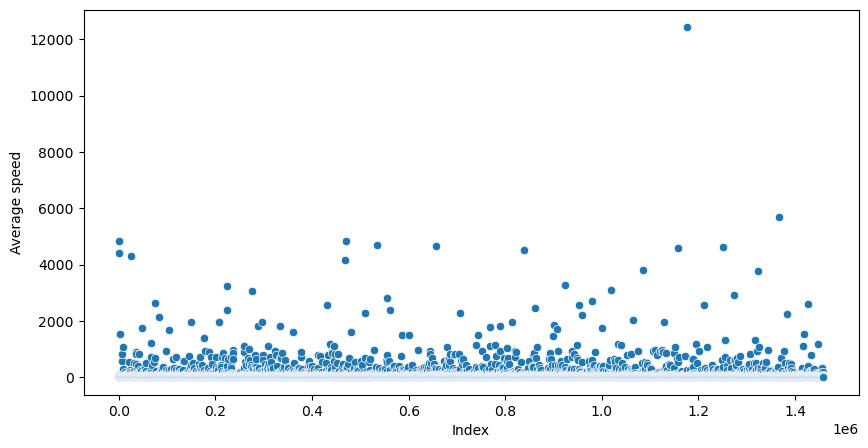

In [122]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [123]:
# Сохраним количество наблюдений
observ_count = taxi_data.shape[0]

# Удалим поездки, длительностью более 24 часа
taxi_data = taxi_data[taxi_data['trip_duration'] <= 24*60*60]
print(f"Количество выбросов по признаку длительности поездки: {observ_count - taxi_data.shape[0]}")

# Сохраним количество наблюдений
observ_count = taxi_data.shape[0]

# Создадим вспомагательный признак средней скорости
taxi_data['avg_speed'] = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

# Удалим  поездки со средней скоростью более 300 км/ч и вспомагательный признак
taxi_data = taxi_data[taxi_data['avg_speed'] <= 300]
taxi_data.drop(['avg_speed'], inplace=True, axis=1)
print(f"Количество выбросов по признаку скорости: {observ_count - taxi_data.shape[0]}")

Количество выбросов по признаку длительности поездки: 4
Количество выбросов по признаку скорости: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [124]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

p=0.000
Данные не распределены нормально (мы отвергаем H0)


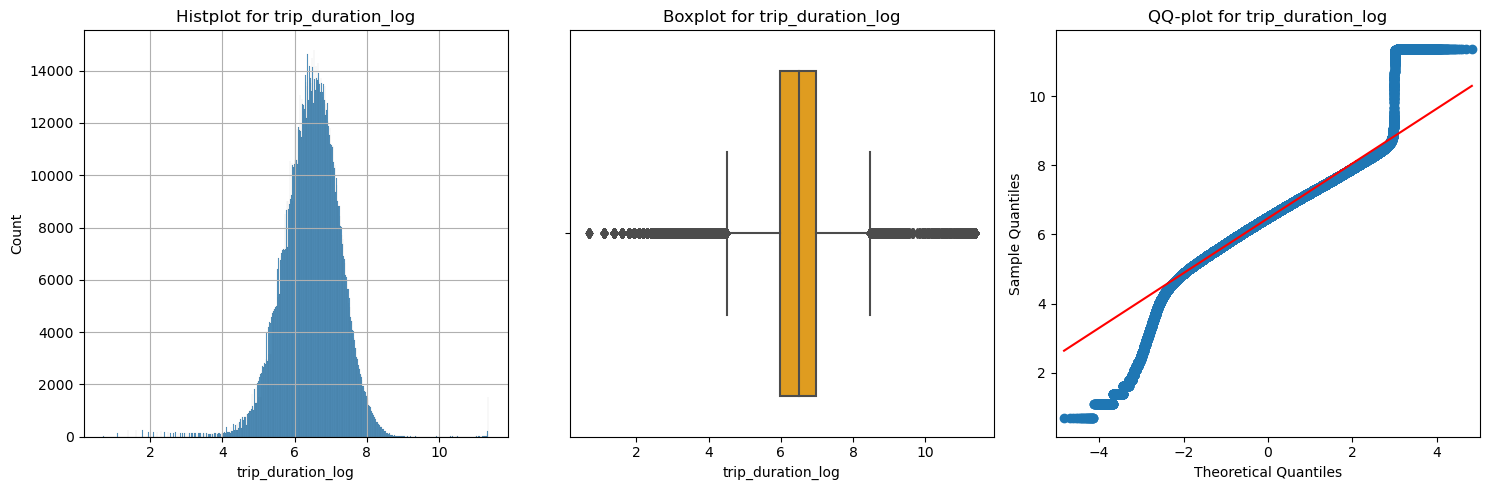

In [125]:
# Задаем фигуру и координатные сетки
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # фигура + 1 х 3 координатных плоскостей

# Строим гистограмму распределения признака 
histplot = sns.histplot(data=taxi_data, x='trip_duration_log',palette=['orange', 'blue'], ax=axes[0])
# Добавляем подпись графику
histplot.set_title('Histplot for trip_duration_log')
# Доьавляем сетку
histplot.grid()

# Строим диаграмму размаха
boxplot = sns.boxplot(data=taxi_data, x='trip_duration_log', palette=['orange', 'blue'], ax=axes[1])
#Добавляем подпись графику
boxplot.set_title('Boxplot for trip_duration_log');

# На гистограмме и диаграмме размаха видны выбросы слева и справа, 
# построим QQ-график, что бы увидеть отклонение распределения от нормального
qqplt = qqplot(taxi_data.trip_duration_log, line='s', ax=axes[2])
# Добавляем подпись графику
plt.title('QQ-plot for trip_duration_log')
plt.tight_layout() #выравнивание графиков

# Проверим гипотезу о нормальности распределения с помощью теста Д’Агостино
# Нулевая гипотеза - данные распределены нормально, альтерноативная - данные не распределены нормально 
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

# Установим уровень значимости в 5%
alpha = 0.05

# Проверим нормальность рапсределения данных 
_, p = stats.normaltest(taxi_data['trip_duration_log'])

# normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
    print(H0)
else:
	print(Ha)

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

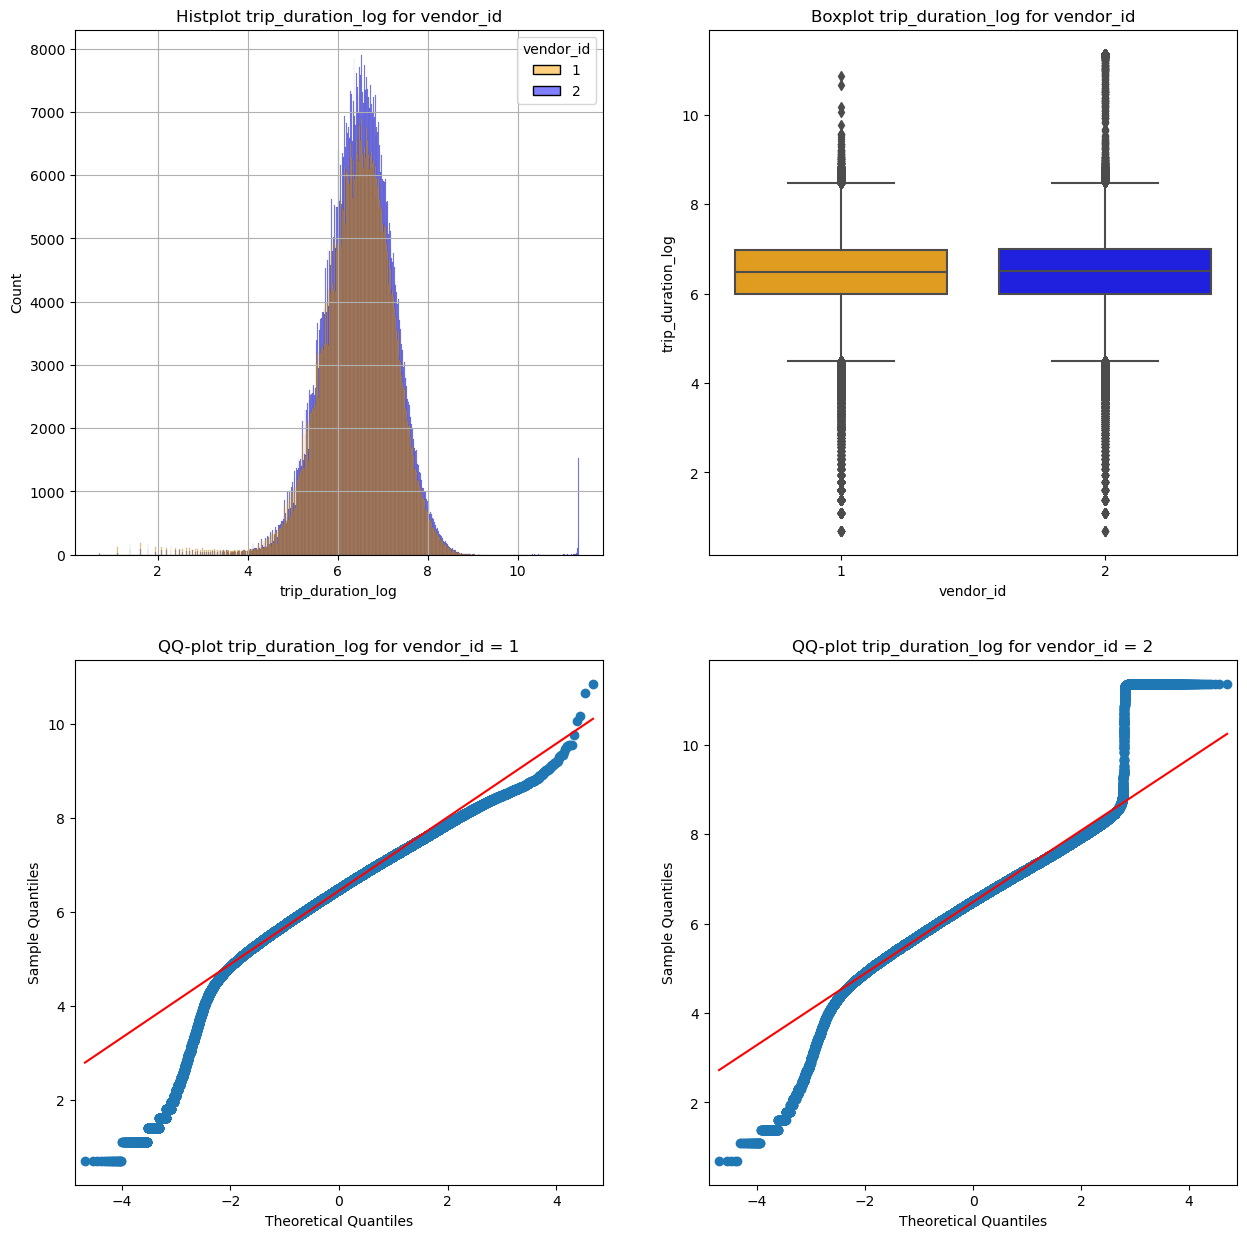

In [126]:
# Задаем фигуру и координатные сетки
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15)) # фигура + 2 х 2 координатных плоскостей

# Строим гистограмму распределения признака 
histplot = sns.histplot(data=taxi_data, x='trip_duration_log', hue='vendor_id', palette=['orange', 'blue'], ax=axes[0][0])
# Добавляем подпись графику
histplot.set_title('Histplot trip_duration_log for vendor_id')
# Добавляем сетку
histplot.grid()
# Строим диаграмму размаха
boxplot = sns.boxplot(data=taxi_data, y='trip_duration_log', x='vendor_id', palette=['orange', 'blue'], ax=axes[0][1])
# Добавляем подпись графику
boxplot.set_title('Boxplot trip_duration_log for vendor_id');
# qq-график для таксопарка 1
qqplt_1 = qqplot(taxi_data[taxi_data['vendor_id']==1]['trip_duration_log'], line='s', ax=axes[1][0])
axes[1][0].set_title('QQ-plot trip_duration_log for vendor_id = 1');
# qq - график для таксопарка 2
qqplt_2 = qqplot(taxi_data[taxi_data['vendor_id']==2]['trip_duration_log'], line='s', ax=axes[1][1])
# Добавляем подпись графику
axes[1][1].set_title('QQ-plot trip_duration_log for vendor_id = 2');

### *Вывод*

Распределение графиков очень похожи, различие присутствует в выбросах с большей стороны. У таксопарка номер 2 больше выбросов. Можно сделать вывод, что распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки. 

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

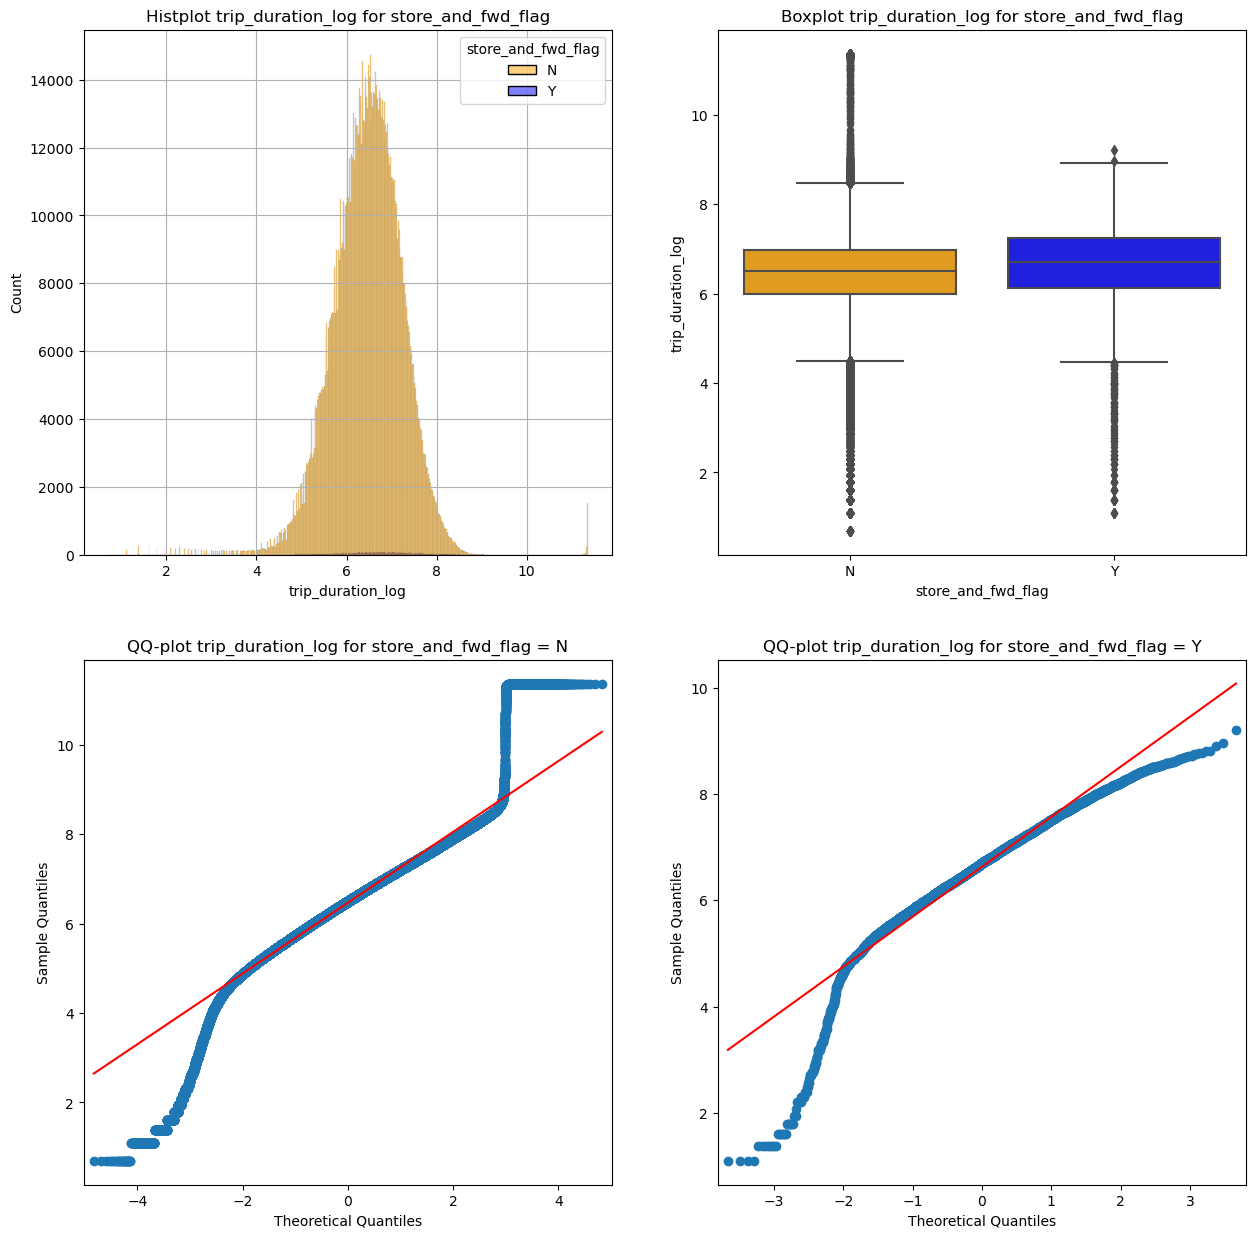

In [127]:
# Задаем фигуру и координатные сетки
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15)) # фигура + 2 х 2 координатных плоскостей

# Строим гистограмму распределения признака 
histplot = sns.histplot(data=taxi_data, x='trip_duration_log', hue='store_and_fwd_flag', palette=['orange', 'blue'], ax=axes[0][0])
# Добавляем подпись графику
histplot.set_title('Histplot trip_duration_log for store_and_fwd_flag')
# Добавляем сетку
histplot.grid()
# Строим диаграмму размаха
boxplot = sns.boxplot(data=taxi_data, y='trip_duration_log', x='store_and_fwd_flag', palette=['orange', 'blue'], ax=axes[0][1])
# Добавляем подпись графику
boxplot.set_title('Boxplot trip_duration_log for store_and_fwd_flag');
# qq
qqplt_1 = qqplot(taxi_data[taxi_data['store_and_fwd_flag']=='N']['trip_duration_log'], line='s', ax=axes[1][0])
axes[1][0].set_title('QQ-plot trip_duration_log for store_and_fwd_flag = N');
# qq
qqplt_2 = qqplot(taxi_data[taxi_data['store_and_fwd_flag']=="Y"]['trip_duration_log'], line='s', ax=axes[1][1])
# Добавляем подпись графику
axes[1][1].set_title('QQ-plot trip_duration_log for store_and_fwd_flag = Y');

### *Вывод*

На графиках видно, что присутствуют различия в распределениях с большей стороны. Для поездок из группы N гораздо больше выбросов. Можно сделать вывод, что распределения в группах отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

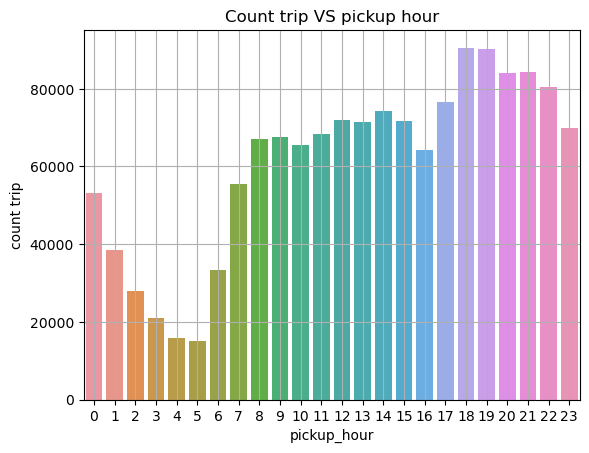

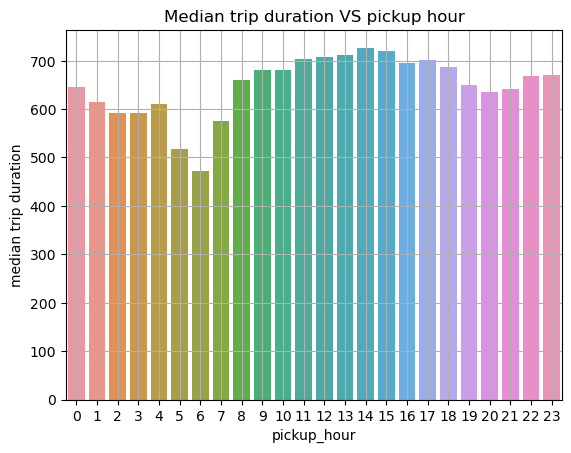

In [128]:
# Группируем данные по признаку часа начала поездки и определяем количество поездок
data = taxi_data.groupby('pickup_hour', as_index=False)['id'].count()

# Построим визуализацию количества поездок в зависимости от времени суток
fig = sns.barplot(data=data, x='pickup_hour', y='id')
fig.set_ylabel('count trip')
fig.set_title('Count trip VS pickup hour')
fig.grid()
plt.show();

# Группируем данные по признаку часа начала поездки и определяем медианную длительность поездки
data = taxi_data.groupby('pickup_hour', as_index=False)['trip_duration'].median()

# Построим визуализацию медианной длительности поездки в зависимости от времени суток
fig = sns.barplot(data=data, x='pickup_hour', y='trip_duration')
fig.set_ylabel('median trip duration')
fig.set_title('Median trip duration VS pickup hour')
fig.grid()
plt.show();

### *Вывод*

На графиках видно, что наименьшее число поездок приходится на период с 0 до 6 часов. Меньше всего вызовов приходится на 5 часов утра. Наиболее продолжительные поездки по медианному значению приходятся на период с 10 до 18 часов, пик длительности - 14 часов.

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:       
а) В какой день недели совершается больше всего поездок?            
б) В какой день недели медианная длительность поездок наименьшая?


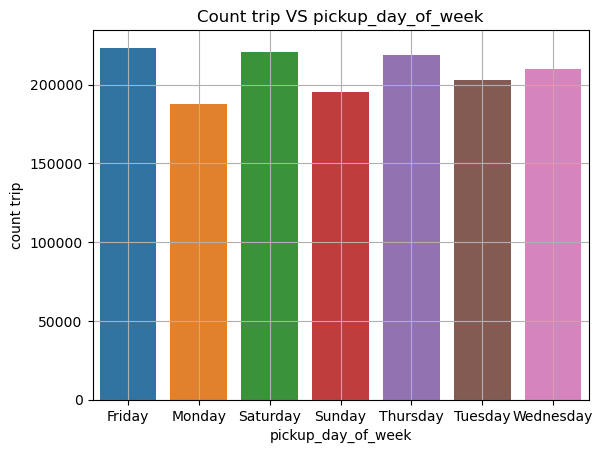

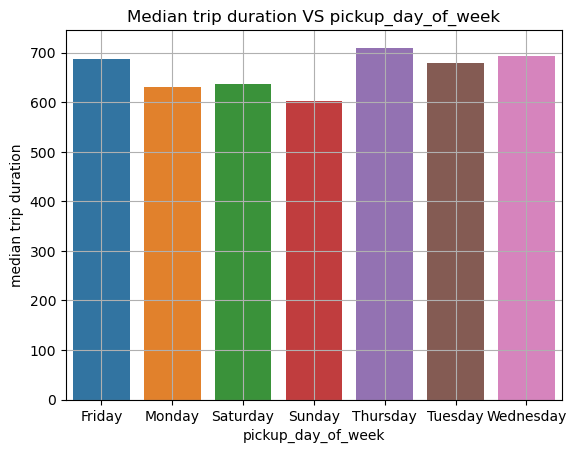

In [129]:
# Группируем данные по признаку часа начала поездки и определяем количество поездок
data = taxi_data.groupby('pickup_day_of_week', as_index=False)['id'].count()

# Построим визуализацию количества поездок в зависимости от времени суток
fig = sns.barplot(data=data, x='pickup_day_of_week', y='id')
fig.set_ylabel('count trip')
fig.set_title('Count trip VS pickup_day_of_week')
fig.grid()
plt.show();

# Группируем данные по признаку часа начала поездки и определяем медианную длительность поездки
data = taxi_data.groupby('pickup_day_of_week', as_index=False)['trip_duration'].median()

# Построим визуализацию медианной длительности поездки в зависимости от времени суток
fig = sns.barplot(data=data, x='pickup_day_of_week', y='trip_duration')
fig.set_ylabel('median trip duration')
fig.set_title('Median trip duration VS pickup_day_of_week')
fig.grid()
plt.show();

### *Вывод*

На графиках видно, что больше всего поездок совершается в пятницу. Наименьшая медианная длительность поездок наблюдается в воскресенье.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

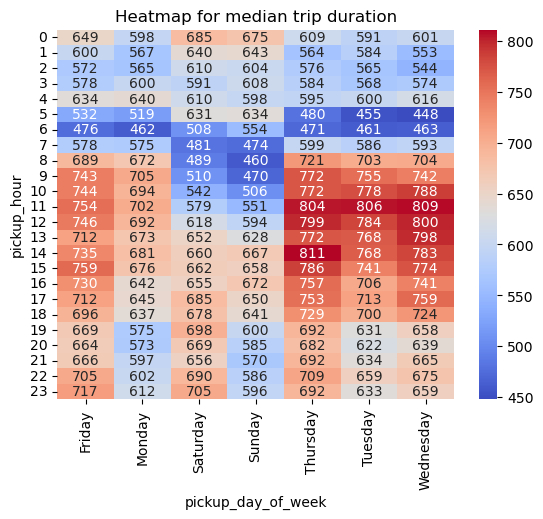

In [130]:
# Строим сводную таблицу медианной длительности поездки в зависимости от часа и дня недели
data = taxi_data.pivot_table(index='pickup_hour',
                             columns='pickup_day_of_week',
                             values='trip_duration',
                             aggfunc='median'
                             )

# Строим тепловую карту для полученной таблицы
heatmap = sns.heatmap(data, annot=True, fmt='.3g', cmap='coolwarm')
heatmap.set_title('Heatmap for median trip duration');

### *Вывод*

На графиках видно, что cамые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.
Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня. 

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


Количество кластеров не попавших в границы города для точек начала поездки: 2
Количество кластеров не попавших в границы города для точек окончания поездки: 3


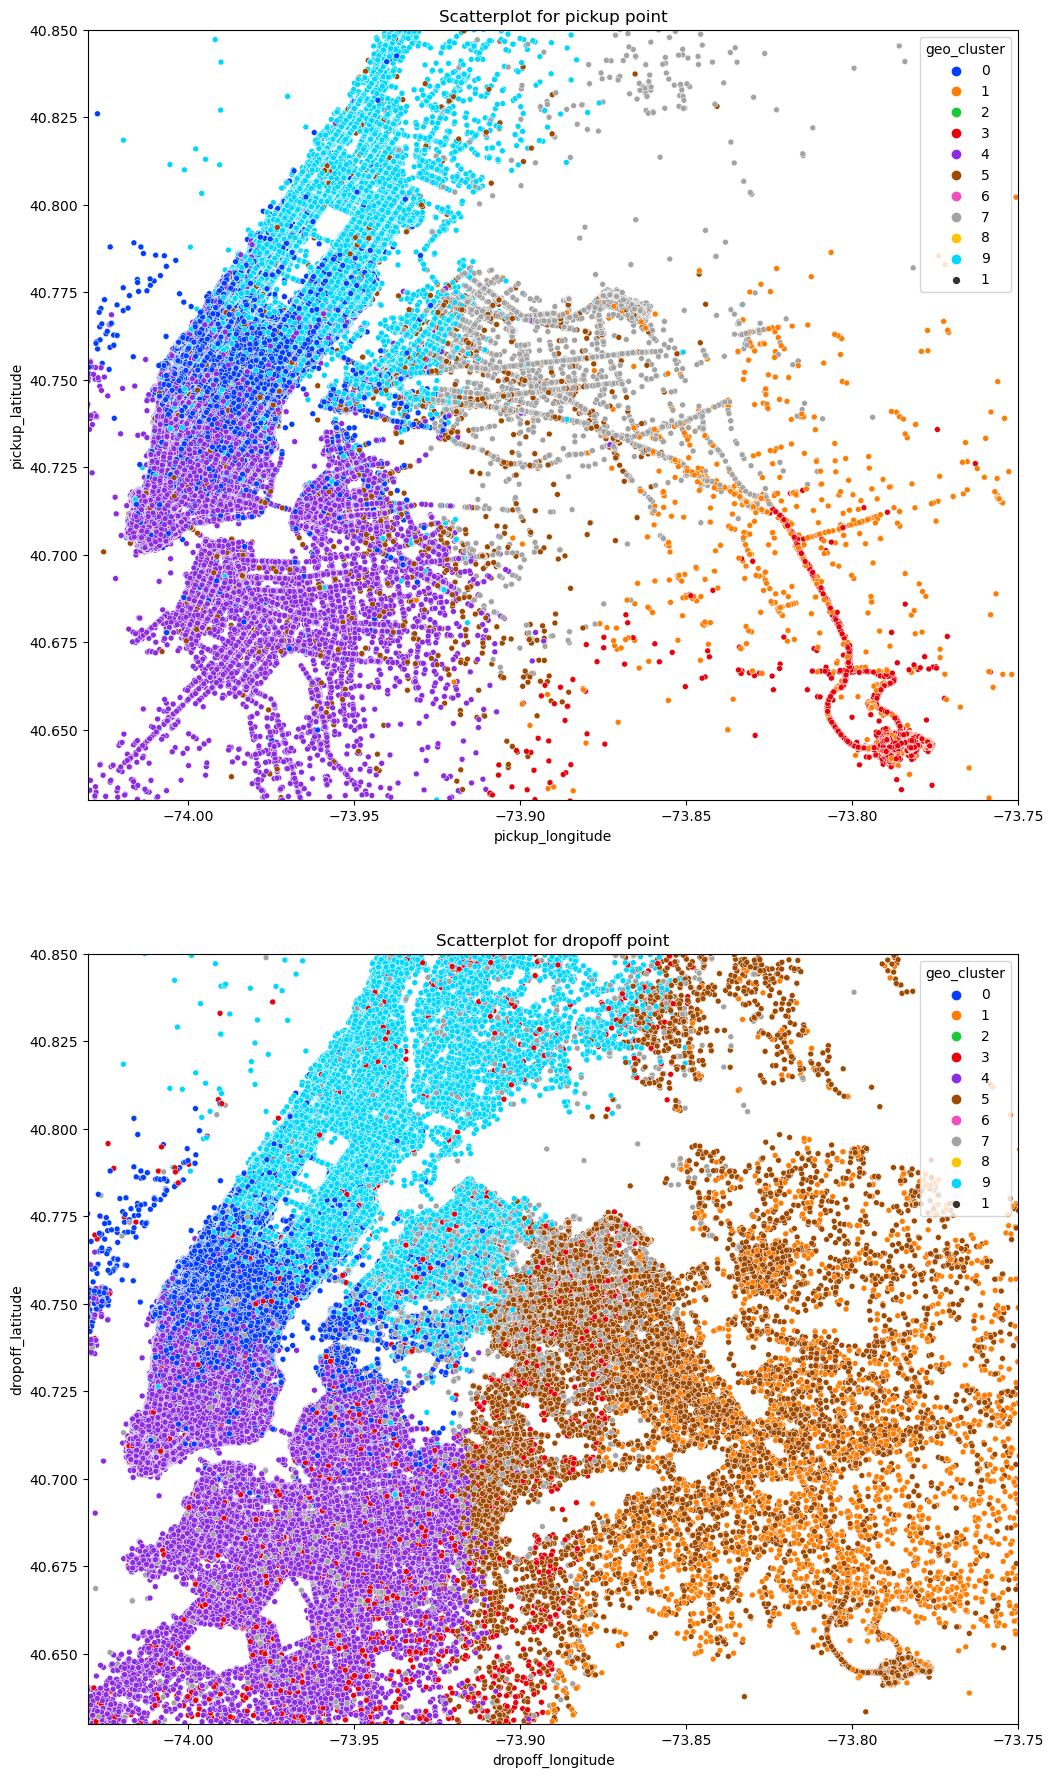

In [131]:
# Границы города
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Строим диаграммы рассеяния для точек начала и окончания поездки
fig, ax = plt.subplots(ncols=1, nrows=2, sharex='row', sharey='col', figsize=(12, 22))

sns.scatterplot(x='pickup_longitude',
                y='pickup_latitude', 
                data=taxi_data, 
                hue='geo_cluster',
                size=1,
                palette='bright',    
                ax=ax[0],
                legend='full'
                )

sns.scatterplot(x='dropoff_longitude',
                y='dropoff_latitude', 
                data=taxi_data, 
                size=1,
                hue='geo_cluster',
                palette='bright',
                ax=ax[1],
                legend='full'
                )

# Задаем границы отображения 
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
ax[1].set_xlim(city_long_border)
ax[1].set_ylim(city_lat_border)

ax[0].set_title('Scatterplot for pickup point')
ax[1].set_title('Scatterplot for dropoff point')

# Задаем маски границ  широты и долготы для точек начала поездки
mask_p_lat = (taxi_data['pickup_latitude'] <= 40.85)&(taxi_data['pickup_latitude'] >= 40.63)
mask_p_lng = (taxi_data['pickup_longitude'] <= -73.75)&(taxi_data['pickup_longitude'] >= -74.03)
# Задаем маски границ  широты и долготы для точек окончания поездки
mask_d_lat = (taxi_data['dropoff_latitude'] <= 40.85)&(taxi_data['dropoff_latitude'] >= 40.63)
mask_d_lng = (taxi_data['dropoff_longitude'] <= -73.75)&(taxi_data['dropoff_longitude'] >= -74.03)

# Выводим количество кластеров не попавших в границы города
print(f"Количество кластеров не попавших в границы города для точек начала поездки: "
      f"{10 - taxi_data[mask_p_lat&mask_p_lng]['geo_cluster'].nunique()}")
print(f"Количество кластеров не попавших в границы города для точек окончания поездки: "
      f"{10 - taxi_data[mask_d_lat&mask_d_lng]['geo_cluster'].nunique()}")

### *Выводы*
- Награфиках явно отсутствуют 2 кластера второй - зеленый и восьмой - желтый.
- У первого, третьего и пятого кластера точки начала и окончания поездок сильно отличаются, т.е. длительность поездок наибольшая.
- Количество точек начала поездки значительно меньше, чем точек окончания поездок. Значит преимущественно люди перемещаются из дома в различные места. В тоже времч это может говорить и о том, что есть большое количество заказов вне города (например, аэропорт) с пунктом назначения в городе.

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [132]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [133]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [134]:
# Исключаем неинформативный признак и признак создающий утечку данных
train_data.drop(['id','dropoff_datetime'], inplace=True, axis=1)
print(f'В таблице осталось {train_data.shape[1]} столбцов')

В таблице осталось 25 столбцов


### *Выводы*
- Уникальным для каждой поездки является её идентификатор — столбец id. Он никак не связан с длительностью поездки и не имеет значения при её прогнозировании.
- Утечка данных (data leak) — это ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.
- В наших данных утечку создаёт признак dropoff_datetime — зафиксированное время остановки счётчика. Начиная поездку, мы никак не можем точно знать, когда она закончится, ведь мы как раз и пытаемся предсказать время окончания поездки.

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [135]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [136]:
# Кодируем признаки vendor_id и store_and_fwd_flag
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# Отвечаем на поставленные вопросы
print(f"Среднее значение по признаку vendor_id: "
      f"{round(train_data['vendor_id'].mean(),2)}")
print(f"Среднее значение по признаку store_and_fwd_flag: "
      f"{round(train_data['store_and_fwd_flag'].mean(),3)}")


Среднее значение по признаку vendor_id: 0.53
Среднее значение по признаку store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [137]:
# Задаем список признаков для изменения
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Создаем кодировщик
one_hot_encoder = preprocessing.OneHotEncoder(drop='first')
 
# 'Учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray()
 
# Запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out()

# Преобразуем массив в датафрейм
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
print(f'Количество полученных бинарных столбцов: {data_onehot.shape[1]}')

Количество полученных бинарных столбцов: 18


Добавим полученную таблицу с закодированными признаками:

In [138]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [139]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [140]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [141]:
# Создаем объект класса SelectKBest
selector = feature_selection.SelectKBest(feature_selection.f_regression, k=25)

# Обучаем селектор и выводим имена отобранных признаков
selector.fit(X_train, y_train_log)
best_features = selector.get_feature_names_out()
print(best_features)

# Преобразуем обучающую и валидационную выборки
X_train_select = X_train[best_features]
X_valid_select = X_valid[best_features]

['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_Monday'
 'pickup_day_of_week_Saturday' 'pickup_day_of_week_Sunday'
 'pickup_day_of_week_Thursday' 'pickup_day_of_week_Tuesday'
 'pickup_day_of_week_Wednesday' 'geo_cluster_1' 'geo_cluster_3'
 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [142]:
# Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()

# Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train_select)

# Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train_select)
X_valid_scaled = scaler.transform(X_valid_select)

# Преобразуем numpy массив в датафрейм
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_select.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid_select.columns)

# Рассчитываем среднее арифметическое для первого столбца матрицы из валидационной выборки
print(f'Cреднее арифметическое для первого предиктора из валидационной выборки: '
      f'{round(X_valid_scaled.iloc[:,0].mean(),2)}')

Cреднее арифметическое для первого предиктора из валидационной выборки: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [143]:
# Создаем модель линейной регрессии и обучаем на тренировочной выборке
lr = linear_model.LinearRegression()
lr.fit(X_train_scaled, y_train_log)

# Делаем предсказания для обучающей и валидационной выборки
y_log_pred_train = lr.predict(X_train_scaled)
y_log_pred_valid = lr.predict(X_valid_scaled)

# Рассчитываем значение метрики RMSLE для обеих выборок
print(f'Train RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_log_pred_train)),2)}')
print(f'Valid RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_log_pred_valid)),2)}')

Train RMSLE: 0.54
Valid RMSLE: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [144]:
# Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

# Вычисляем параметры генерации
poly.fit(X_train_scaled)

# Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_valid_scaled_poly = poly.transform(X_valid_scaled)

# Создаем модель линейной регрессии и обучаем на полиномиальных признаках
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train_log)

# Делаем предсказания для обучающей и валидационной выборки
y_log_pred_train_poly = lr_poly.predict(X_train_scaled_poly)
y_log_pred_valid_poly = lr_poly.predict(X_valid_scaled_poly)

# Рассчитываем значение метрики RMSLE для обеих выборок
print(f'Train RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_log_pred_train_poly)),2)}')
print(f'Valid RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_log_pred_valid_poly)),2)}')

Train RMSLE: 0.47
Valid RMSLE: 0.7


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [145]:
# Создаем модель линейной регрессии с L2-регуляризацией и обучаем на полиномиальных признаках
ridge_lr_poly = linear_model.Ridge(alpha=1)
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)

# Делаем предсказания для обучающей и валидационной выборки
y_train_pred_l2 = ridge_lr_poly.predict(X_train_scaled_poly)
y_valid_pred_l2 = ridge_lr_poly.predict(X_valid_scaled_poly)

# Рассчитываем значение метрики RMSLE для обеих выборок
print(f'Train RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_train_pred_l2)),2)}')
print(f'Valid RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_valid_pred_l2)),2)}')

Train RMSLE: 0.48
Valid RMSLE: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [146]:
# Создаем модель дерева решений и обучаем на тренировочной выборке
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train_scaled, y_train_log)

# Делаем предсказания для обучающей и валидационной выборки
y_dt_pred_train = dtree.predict(X_train_scaled)
y_dt_pred_valid = dtree.predict(X_valid_scaled)

# Рассчитываем значение метрики RMSLE для обеих выборок
print(f'Train RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_dt_pred_train)),2)}')
print(f'Valid RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_dt_pred_valid)),2)}')

Train RMSLE: 0.0
Valid RMSLE: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


Train RMSLE for max_depth=12: 0.41
Valid RMSLE for max_depth=12: 0.43


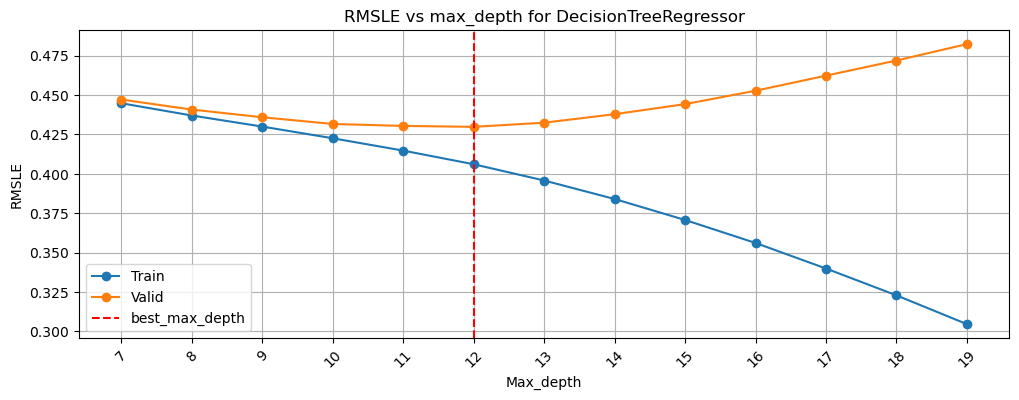

In [147]:
# Создаём список из 13 возможных значений max_depth от 7 до 19 включительно
depth_list = range(7,20)

# Создаём пустые списки, в которые будем добавлять результаты 
train_scores_dt = []
valid_scores_dt = []
for depth in depth_list:
    # Создаём объект класса DecisionTreeRegressor
    dtree = tree.DecisionTreeRegressor(max_depth=depth,
                                       random_state=42
                                       )
        
    # Обучаем модель
    dtree.fit(X_train_scaled, y_train_log)
    
    # Делаем предсказания для обучающей и валидационной выборки
    y_dt_pred_train = dtree.predict(X_train_scaled)
    y_dt_pred_valid = dtree.predict(X_valid_scaled)
    
    # Рассчитываем метрику RMSLE для двух выборок и добавляем их в списки
    train_scores_dt.append(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_dt_pred_train)))
    valid_scores_dt.append(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_dt_pred_valid)))

# Выбираем значение max_depth при котором метрика для валидационной выборки минимальна
best_max_depth = depth_list[valid_scores_dt.index(min(valid_scores_dt))]
    
# Строим графики изменения метрики RMSLE в зависимости от значений max_depth
fig, ax = plt.subplots(figsize=(12, 4)) # фигура + координатная плоскость
ax.set_title('RMSLE vs max_depth for DecisionTreeRegressor')
ax.plot(depth_list, train_scores_dt, label='Train', marker='o') # линейный график для тренировочной выборки
ax.plot(depth_list, valid_scores_dt, label='Valid', marker='o') # линейный график для тестовой выборки
ax.axvline(x=best_max_depth, c='red', linestyle='--', label='best_max_depth')
ax.set_xlabel('Max_depth') # название оси абсцисс
ax.set_ylabel('RMSLE') # название оси ординат
ax.set_xticks(depth_list) # метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) # поворот меток на оси абсцисс
ax.legend(); # отображение легенды
ax.grid() # отображение сетки

# Используем выбраное значение max_depth для создания и обучения дерева решений
dtree = tree.DecisionTreeRegressor(max_depth=best_max_depth,
                                   random_state=42
                                   )
dtree.fit(X_train_scaled, y_train_log)

# Делаем предсказания для обучающей и валидационной выборки
y_dt_pred_train = dtree.predict(X_train_scaled)
y_dt_pred_valid = dtree.predict(X_valid_scaled)

# Рассчитываем значение метрики RMSLE для обеих выборок
print(f'Train RMSLE for max_depth={best_max_depth}: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_dt_pred_train)),2)}')
print(f'Valid RMSLE for max_depth={best_max_depth}: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_dt_pred_valid)),2)}')

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [148]:
# Создаем модель случайного леса и обучаем на тренировочной выборке
r_forest_reg = ensemble.RandomForestRegressor(n_estimators=200,
                                              max_depth=12,
                                              criterion='squared_error',
                                              min_samples_split=20,
                                              random_state=42,
                                              n_jobs=-1
                                              )
r_forest_reg.fit(X_train_scaled, y_train_log)

# Делаем предсказания для обучающей и валидационной выборки
y_rf_pred_train = r_forest_reg.predict(X_train_scaled)
y_rf_pred_valid = r_forest_reg.predict(X_valid_scaled)

# Рассчитываем значение метрики RMSLE для обеих выборок
print(f'Train RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_rf_pred_train)),2)}')
print(f'Valid RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_rf_pred_valid)),2)}')

Train RMSLE: 0.4
Valid RMSLE: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [149]:
# Создаем модель градиентного бустинга над деревьями решений и обучаем на тренировочной выборке
gbdt = ensemble.GradientBoostingRegressor(learning_rate = 0.5,
                                          n_estimators = 100,
                                          max_depth = 6,
                                          min_samples_split = 30,
                                          random_state = 42                                          
                                          )
gbdt.fit(X_train_scaled, y_train_log)

# Делаем предсказания для обучающей и валидационной выборки
y_gbdt_pred_train = gbdt.predict(X_train_scaled)
y_gbdt_pred_valid = gbdt.predict(X_valid_scaled)

# Рассчитываем значение метрики RMSLE для обеих выборок
print(f'Train RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_train_log, y_pred=y_gbdt_pred_train)),2)}')
print(f'Valid RMSLE: '
      f'{round(np.sqrt(metrics.mean_squared_error(y_true=y_valid_log, y_pred=y_gbdt_pred_valid)),2)}')

Train RMSLE: 0.37
Valid RMSLE: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### *Вывод*
Наилучший результат (наименьшее значение RMSLE на валидационной выборке) показала модель градиентного бустинга над деревьями решений

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


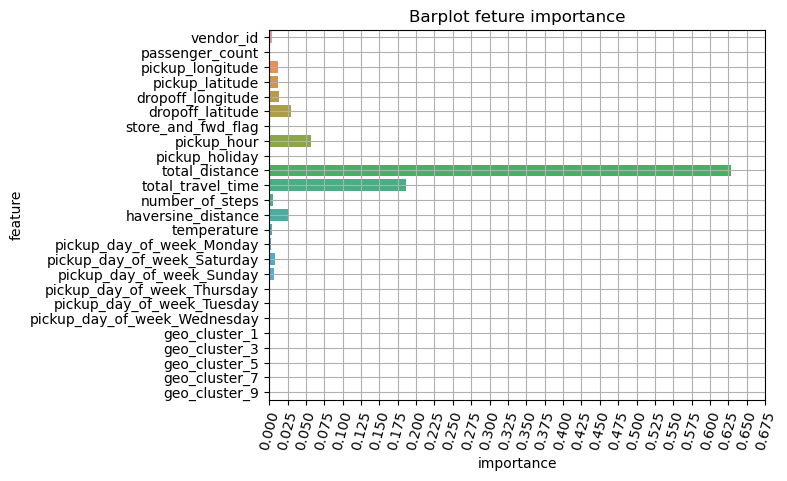

In [150]:
# Оценим, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
importance = gbdt.feature_importances_

# Визуализируем значимость признаков с помощью столбчатой диаграммы
fig = sns.barplot(y=best_features, x=importance)
fig.set_yticks(ticks=(list(range(0,25, 1))))
fig.set_xticks(ticks=(list(np.arange(0.0, 0.7, 0.025))))
fig.set_xlabel('importance')
fig.set_ylabel('feature')
fig.set_title('Barplot feture importance')
fig.grid()
fig.xaxis.set_tick_params(rotation=75)

### *Вывод*
В первую тройку наиболее значимых признаков для модели градиентного бустинга входят признаки:
- total_distance;
- total_travel_time;
- pickup_hour.


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [151]:
# Переводим целевую переменную и предсказания в обычный масштаб
y_valid = np.exp(y_valid_log)-1
y_valid_pred = np.exp(y_gbdt_pred_valid)-1

# Рассчитываем значение метрики MeAE для обеих выборок
print(f'Valid MeAE: '
      f'{round(metrics.median_absolute_error(y_true=y_valid, y_pred=y_valid_pred)/60,1)}')

Valid MeAE: 1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [152]:
test_data = pd.read_csv('/kaggle/input/tables/Project5_test_data/Project5_test_data.csv')
osrm_data_test = pd.read_csv('/kaggle/input/tables/Project5_osrm_data_test/Project5_osrm_data_test.csv')
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [153]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [154]:
test_data_onehot
column_names

array(['pickup_day_of_week_Monday', 'pickup_day_of_week_Saturday',
       'pickup_day_of_week_Sunday', 'pickup_day_of_week_Thursday',
       'pickup_day_of_week_Tuesday', 'pickup_day_of_week_Wednesday',
       'geo_cluster_1', 'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_4',
       'geo_cluster_5', 'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8',
       'geo_cluster_9', 'events_None', 'events_Rain', 'events_Snow'],
      dtype=object)

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [155]:
# Делаем предсказание с помощью модели градиентного бустинга
y_test_predict_log = gbdt.predict(X_test_scaled)
y_test_predict = np.exp(y_test_predict_log)-1
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/kaggle/working/submission_gb.csv', index=False)

### *Вывод*
Результат сабмита на  Kaggle:
- Score: 0.39978;
- Public score: 0.40216.

### **В качестве бонуса**

В завершение по ансамблевым моделям мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [156]:
#!pip install xgboost

После чего модуль можно импортировать:

In [157]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [158]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [159]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42222	valid-rmse:5.42195
[10]	train-rmse:1.93569	valid-rmse:1.93563
[20]	train-rmse:0.78551	valid-rmse:0.78635
[30]	train-rmse:0.47924	valid-rmse:0.48127
[40]	train-rmse:0.42057	valid-rmse:0.42325
[50]	train-rmse:0.40874	valid-rmse:0.41188
[60]	train-rmse:0.40423	valid-rmse:0.40773
[70]	train-rmse:0.40110	valid-rmse:0.40502
[80]	train-rmse:0.39888	valid-rmse:0.40310
[90]	train-rmse:0.39739	valid-rmse:0.40183
[100]	train-rmse:0.39571	valid-rmse:0.40040
[110]	train-rmse:0.39416	valid-rmse:0.39911
[120]	train-rmse:0.39324	valid-rmse:0.39856
[130]	train-rmse:0.39188	valid-rmse:0.39752
[140]	train-rmse:0.39080	valid-rmse:0.39677
[150]	train-rmse:0.38992	valid-rmse:0.39616
[160]	train-rmse:0.38925	valid-rmse:0.39570
[170]	train-rmse:0.38854	valid-rmse:0.39529
[180]	train-rmse:0.38793	valid-rmse:0.39500
[190]	train-rmse:0.38720	valid-rmse:0.39469
[200]	train-rmse:0.38608	valid-rmse:0.39387
[210]	train-rmse:0.38533	valid-rmse:0.39352
[220]	train-rmse:0.38464	valid-rmse:0.39326

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [160]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39107


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

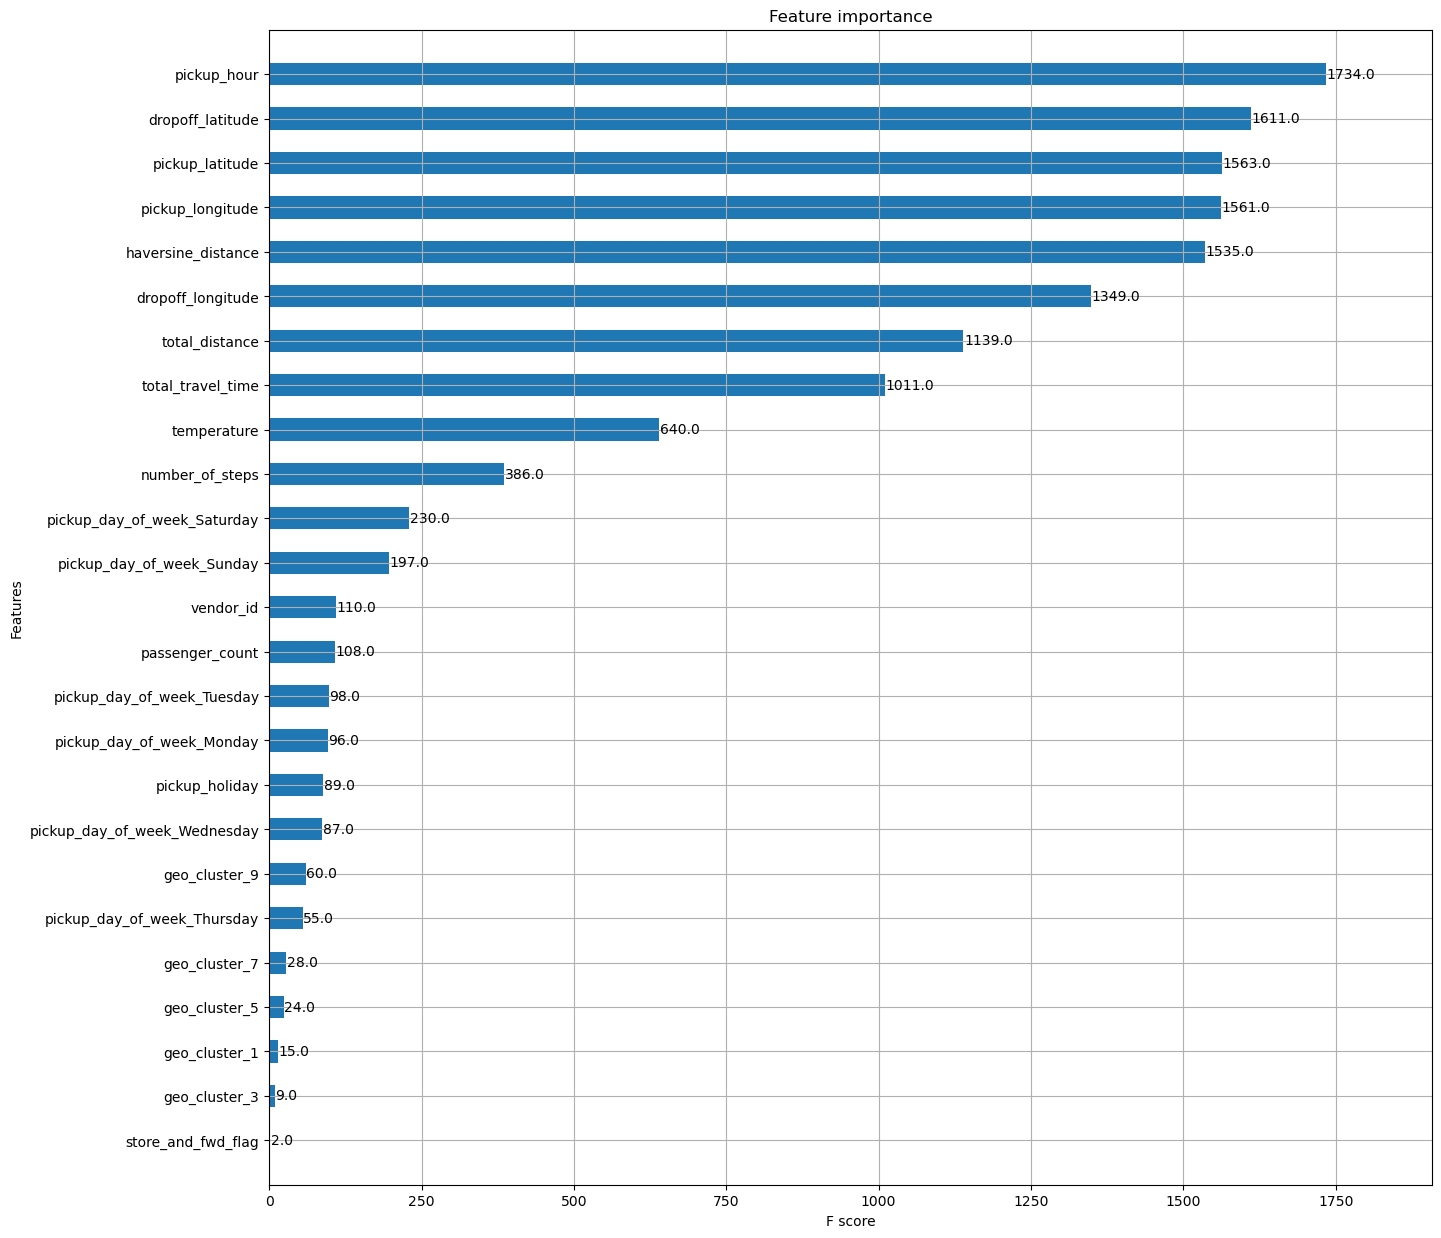

In [161]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

### *Общий вывод*
Удалось решить задачу по прогнозированию длительности поездки на такси. Выполнено исследование данных, обработка пропущенных значений и выбросов. Проведена работа по расширению исходного набора данных на основе нескольких источников информации. Спроектированы новые признаки с помощью Feature Engineering. Проведен разведывательный анализ данных на предмет выявления закономерностей. Проведен отбор и преобразование наиболее значимых при построении модели признаков. Построено несколько базовых моделей (линейная регрессия в различных вариантах, дерево решений). Применены ансамблевые модели - модель случайного леса с подбором максимальной глубины деревьев, модель градиентного бустинга. Лучший результат показала модель градиентного бустинга над деревьями решений, результат сабмита на  Kaggle для данной модели Public score: 0.40216. В качестве бонуса опробованна модель экстремального градиентного бустинга (XGBoost) из библиотеки xgboost. Результат данной модели: Modeling RMSLE 0.39107.